## FOR TRAINING

---



In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0u38SAg9fKgSkdLEgj1l")
project = rf.workspace("dr-ambedkar-institute-of-technology-wd2mo").project("fetus-object-detection")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 939.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fetus-object-detection-2 in yolov8:: 100%|██████████| 5348/5348 [00:01<00:00, 3736.93it/s]


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.4/911.4 kB 30.2 MB/s eta 0:00:00


In [ ]:
# prompt: /content/Fetal-brain-on-augmented-images-1/train/labels
# create a folder which has files from the label folder which has nothing in it

import os
import shutil

# Define source and destination folders
source_folder = "/content/fetus-object-detection-2"
destination_folder = "/content/empty_labels"  # Replace with your desired destination

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate through files in the source folder
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)

    #Check if the file is empty
    if os.stat(source_path).st_size == 0:
        # Copy empty files to the destination folder
        shutil.copy2(source_path, destination_path)

In [4]:
# prompt: /content/empty_labels
# the files inside which have the similar names as these in the images folder, create another folder and move the images there

import os
import shutil

# Define source and destination folders
image_folder = "/content/fetus-object-detection-2"
label_folder = "/content/empty_labels"
destination_image_folder = "/content/moved_images"

# Create the destination folder if it doesn't exist
os.makedirs(destination_image_folder, exist_ok=True)

# Iterate through the label files
for filename in os.listdir(label_folder):
    label_path = os.path.join(label_folder, filename)

    # Extract the base filename without extension
    base_filename = os.path.splitext(filename)[0]

    # Construct the corresponding image file path
    image_filename = base_filename + ".jpg"  # Assuming images are JPGs
    image_path = os.path.join(image_folder, image_filename)

    # Check if the image file exists
    if os.path.exists(image_path):
      destination_image_path = os.path.join(destination_image_folder, image_filename)
      shutil.move(image_path, destination_image_path)

In [5]:
%%writefile /content/fetus-object-detection-2/data.yaml
train: /content/fetus-object-detection-2/train
val: /content/fetus-object-detection-2/valid
nc: 8  # Replace with the actual number of classes in your dataset
names: ['CM','IT','NT','midbrain','nasal bone','nasal skin','nasal tip','palate'] # Replace with your actual class names

Overwriting /content/fetus-object-detection-2/data.yaml


In [6]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 138MB/s]


In [ ]:
# Train the model
model.train(
    data="/content/fetus-object-detection-2/data.yaml",  # Path to your data.yaml file
    epochs=50,                 # Number of epochs
    imgsz=640,                 # Image size
    batch=20,                  # Batch size
    device= 0                 # Use GPU (0) or CPU (-1)
)

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/fetus-object-detection-2/data.yaml, epochs=50, time=None, patience=100, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 15.0MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 59.1MB/s]


AMP: checks passed ✅


train: Scanning /content/fetus-object-detection-2/train/labels... 2338 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2338/2338 [00:01<00:00, 1949.10it/s]


train: New cache created: /content/fetus-object-detection-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/fetus-object-detection-2/valid/labels... 239 images, 0 backgrounds, 0 corrupt: 100%|██████████| 239/239 [00:00<00:00, 1061.27it/s]

val: New cache created: /content/fetus-object-detection-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.75G       2.37       3.34      1.809        201        640: 100%|██████████| 117/117 [00:55<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        239       1743      0.648      0.513       0.63        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.7G      1.794      1.686      1.404        175        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        239       1743       0.75      0.757      0.806      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.71G      1.689      1.393      1.339        229        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        239       1743      0.726      0.822      0.839      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.7G       1.64      1.255      1.299        258        640: 100%|██████████| 117/117 [00:52<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        239       1743      0.789      0.836       0.84       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.7G      1.604       1.16      1.288        208        640: 100%|██████████| 117/117 [00:52<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        239       1743      0.839      0.839      0.883      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.68G      1.577      1.093      1.269        206        640: 100%|██████████| 117/117 [00:52<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]

                   all        239       1743      0.835      0.857      0.887      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.7G      1.541      1.029      1.247        179        640: 100%|██████████| 117/117 [00:51<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        239       1743      0.841      0.877      0.887      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.71G       1.53     0.9962       1.24        152        640: 100%|██████████| 117/117 [00:50<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        239       1743       0.85      0.895      0.906      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.71G      1.512     0.9713       1.23        223        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all        239       1743      0.854      0.885      0.909      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.68G      1.503     0.9451      1.226        238        640: 100%|██████████| 117/117 [00:53<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        239       1743      0.847       0.89      0.909      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.71G      1.476     0.9186      1.212        182        640: 100%|██████████| 117/117 [00:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all        239       1743      0.866      0.885      0.913      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.68G      1.471     0.9014       1.21        156        640: 100%|██████████| 117/117 [00:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        239       1743      0.841      0.873        0.9      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.72G      1.459     0.8765      1.195        187        640: 100%|██████████| 117/117 [00:53<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        239       1743      0.866      0.902      0.922      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.72G      1.443     0.8722      1.196        192        640: 100%|██████████| 117/117 [00:52<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        239       1743      0.867      0.893      0.922      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.72G      1.436     0.8496      1.187        178        640: 100%|██████████| 117/117 [00:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        239       1743       0.86      0.893      0.922      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.69G      1.421     0.8349      1.182        195        640: 100%|██████████| 117/117 [00:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all        239       1743      0.876      0.914      0.935      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.67G      1.423     0.8284       1.18        201        640: 100%|██████████| 117/117 [00:53<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        239       1743      0.878      0.923       0.94      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.71G      1.403     0.8236      1.172        203        640: 100%|██████████| 117/117 [00:51<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        239       1743      0.879      0.919      0.931       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.72G      1.392     0.8076      1.166        204        640: 100%|██████████| 117/117 [00:52<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        239       1743      0.865      0.916      0.935      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.71G      1.394     0.8069      1.169        166        640: 100%|██████████| 117/117 [00:51<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        239       1743      0.888      0.903      0.937       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.73G      1.391     0.7867      1.162        197        640: 100%|██████████| 117/117 [00:50<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        239       1743      0.888      0.913      0.938      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.72G      1.374     0.7817      1.154        126        640: 100%|██████████| 117/117 [00:51<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        239       1743      0.888      0.912      0.938      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.7G       1.37     0.7733      1.158        161        640: 100%|██████████| 117/117 [00:52<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all        239       1743      0.888      0.915      0.945      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.68G      1.359     0.7644      1.148        159        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all        239       1743      0.877      0.929      0.937      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.67G      1.348     0.7553       1.14        195        640: 100%|██████████| 117/117 [00:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all        239       1743      0.884      0.917      0.939      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.67G      1.357     0.7555      1.146        175        640: 100%|██████████| 117/117 [00:52<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        239       1743      0.882      0.926      0.943      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.7G      1.336     0.7409      1.139        174        640: 100%|██████████| 117/117 [00:53<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        239       1743      0.889      0.924      0.938      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.71G      1.324     0.7365      1.131        161        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all        239       1743      0.903      0.909      0.944      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.67G      1.325     0.7322      1.129        229        640: 100%|██████████| 117/117 [00:53<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all        239       1743        0.9      0.912      0.942      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.68G      1.321       0.73      1.125        182        640: 100%|██████████| 117/117 [00:51<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        239       1743      0.887      0.916      0.944      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.7G       1.31     0.7191      1.123        215        640: 100%|██████████| 117/117 [00:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all        239       1743      0.901      0.913      0.944      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.68G      1.307     0.7121      1.122        144        640: 100%|██████████| 117/117 [00:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        239       1743      0.893      0.923      0.945      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.71G      1.293     0.7055      1.116        180        640: 100%|██████████| 117/117 [00:50<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]

                   all        239       1743      0.887      0.927      0.947      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.71G      1.287     0.7062       1.12        147        640: 100%|██████████| 117/117 [00:50<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        239       1743      0.887      0.926      0.941       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.68G      1.288     0.6972      1.113        190        640: 100%|██████████| 117/117 [00:50<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        239       1743      0.887      0.917      0.942      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.68G      1.284     0.6951      1.112        212        640: 100%|██████████| 117/117 [00:51<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]

                   all        239       1743       0.89      0.924      0.945      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.69G      1.274     0.6896      1.103        147        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all        239       1743       0.88      0.936      0.944      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.67G      1.256      0.678      1.102        174        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        239       1743      0.887      0.923      0.945      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.71G      1.266     0.6748      1.106        206        640: 100%|██████████| 117/117 [00:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        239       1743      0.894      0.928      0.944      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.72G      1.255     0.6713        1.1        170        640: 100%|██████████| 117/117 [00:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        239       1743      0.902      0.924       0.95      0.568


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.62G      1.236      0.624      1.123        142        640: 100%|██████████| 117/117 [00:54<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all        239       1743      0.893      0.924      0.944      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.62G      1.206     0.6045      1.105        131        640: 100%|██████████| 117/117 [00:51<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all        239       1743        0.9      0.913      0.941      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.62G      1.192     0.5973        1.1        135        640: 100%|██████████| 117/117 [00:54<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all        239       1743      0.895      0.929      0.942      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.62G      1.182     0.5902      1.095        123        640: 100%|██████████| 117/117 [00:49<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all        239       1743      0.894       0.93      0.944       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.62G      1.171     0.5835      1.088        134        640: 100%|██████████| 117/117 [00:51<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        239       1743      0.902      0.924      0.944      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.62G      1.168     0.5797      1.089        132        640: 100%|██████████| 117/117 [00:50<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        239       1743      0.904       0.92      0.942      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.62G      1.165     0.5761      1.086        132        640: 100%|██████████| 117/117 [00:48<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        239       1743      0.905      0.921      0.945      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.62G      1.152     0.5708       1.08        133        640: 100%|██████████| 117/117 [00:48<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        239       1743      0.894      0.931      0.948      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.62G      1.141     0.5648      1.073        129        640: 100%|██████████| 117/117 [00:47<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]

                   all        239       1743      0.898      0.928      0.945      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.62G       1.14     0.5638      1.073        124        640: 100%|██████████| 117/117 [00:49<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        239       1743      0.905      0.921      0.945       0.57



50 epochs completed in 0.783 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.34s/it]


                   all        239       1743      0.904      0.922      0.946       0.57
                    CM        233        233      0.853      0.876        0.9      0.479
                    IT        233        233      0.918      0.967       0.97      0.594
                    NT        235        235       0.85      0.915       0.94      0.581
              midbrain        236        236       0.99      0.987      0.994      0.656
            nasal bone        212        212      0.871      0.939      0.944      0.554
            nasal skin        174        174      0.909      0.822      0.893      0.448
             nasal tip        206        206       0.91      0.888      0.943      0.501
                palate        214        214      0.933      0.983      0.982      0.747
Speed: 0.4ms preprocess, 2.9ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7da69ad89150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

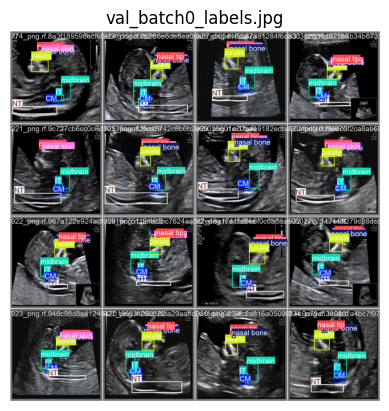

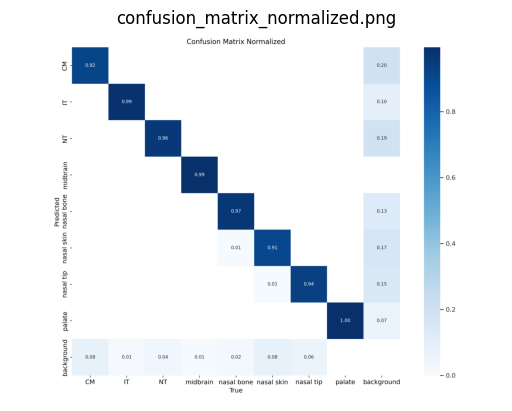

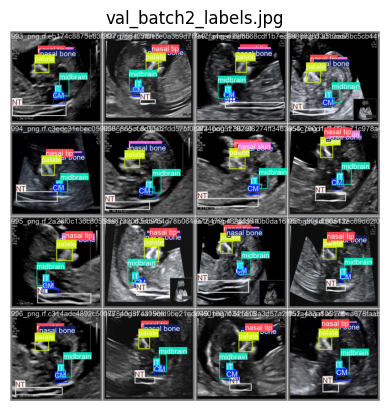

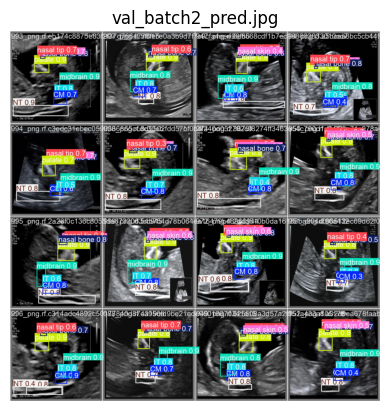

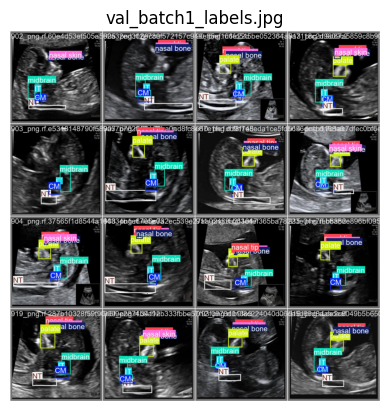

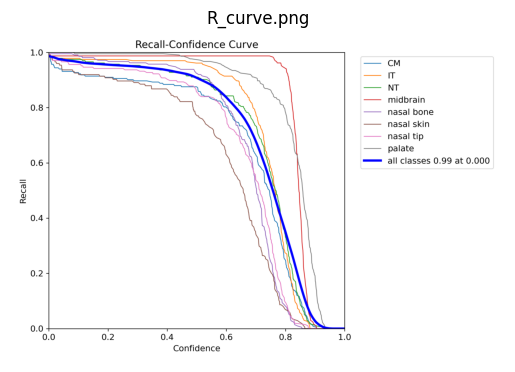

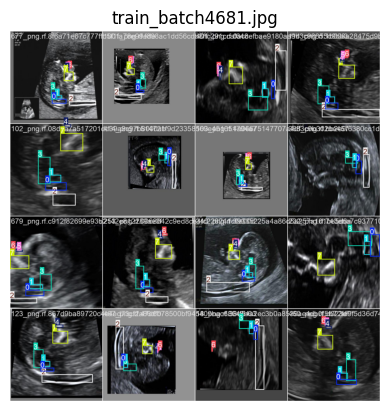

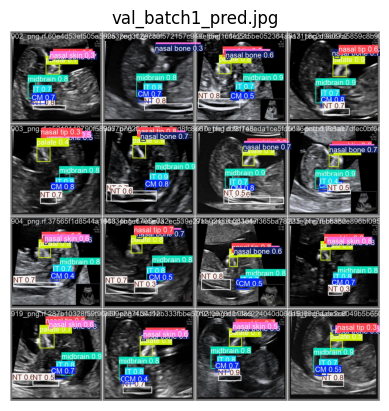

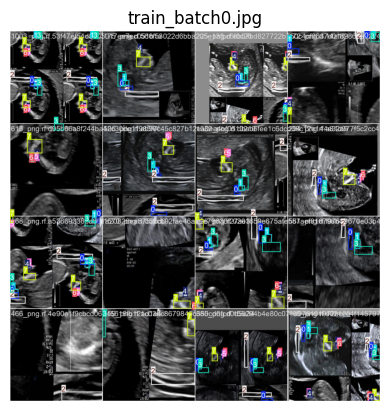

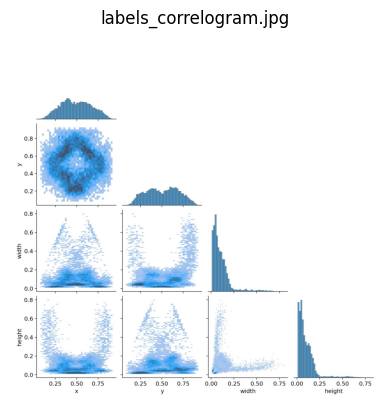

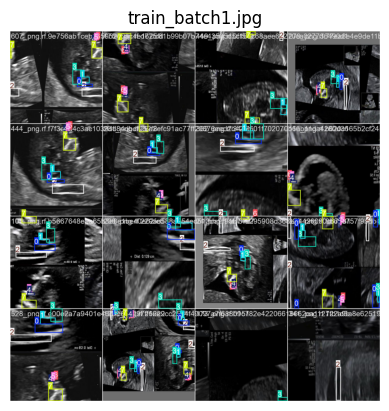

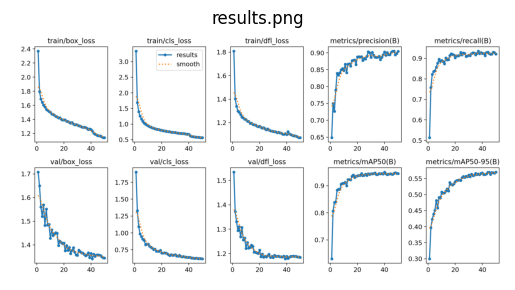

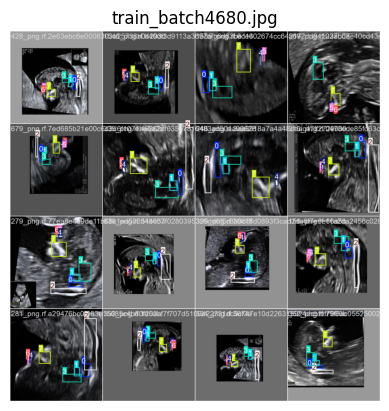

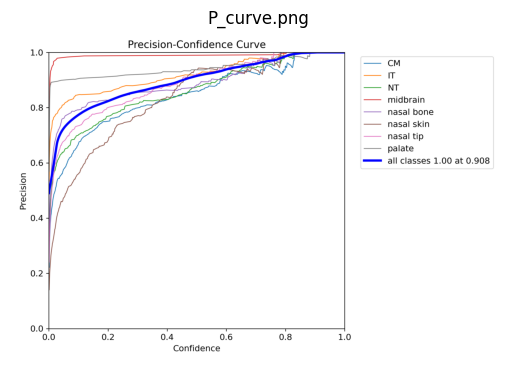

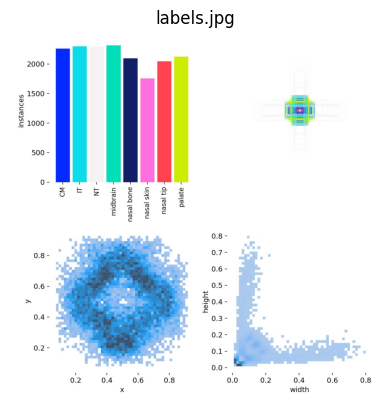

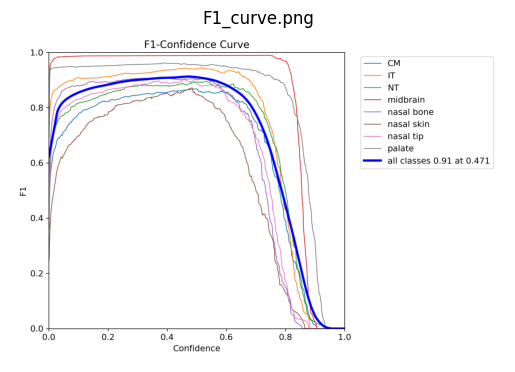

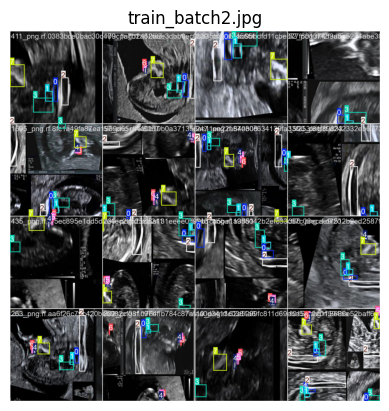

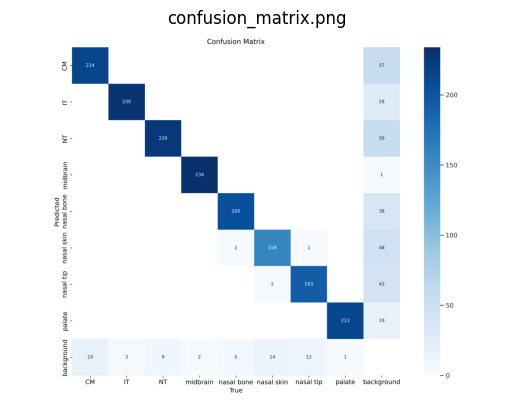

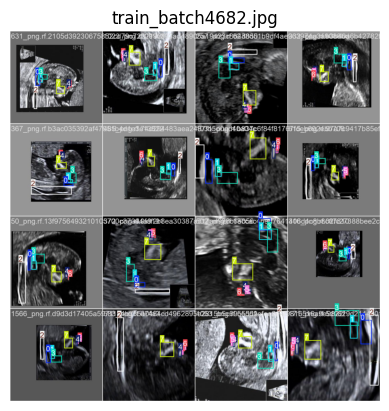

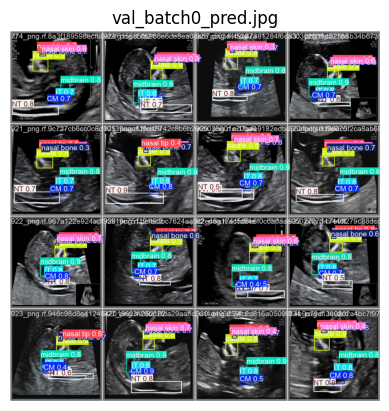

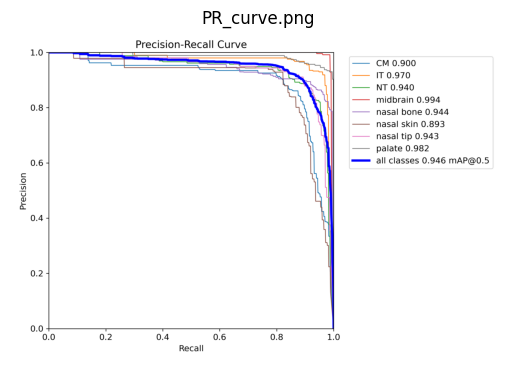

In [ ]:
# prompt: /content/runs/detect/train/weights these are all images in this folder display them

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_dir = "/content/runs/detect/train/"

# Check if the directory exists
if os.path.exists(image_dir):
    # Get a list of all image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Iterate through the image files and display them
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        try:
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.title(image_file)
            plt.axis('off')  # Hide axes
            plt.show()
        except Exception as e:
            print(f"Error displaying image {image_file}: {e}")
else:
    print(f"Directory '{image_dir}' not found.")


image 1/1 /content/fetus-object-detection-2/train/images/1001_png.rf.7f63e39c150e1344e242f0416c8e9a9b.jpg: 640x640 1 CM, 1 IT, 1 NT, 1 midbrain, 1 nasal bone, 1 nasal skin, 1 nasal tip, 1 palate, 419.6ms
Speed: 12.6ms preprocess, 419.6ms inference, 35.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


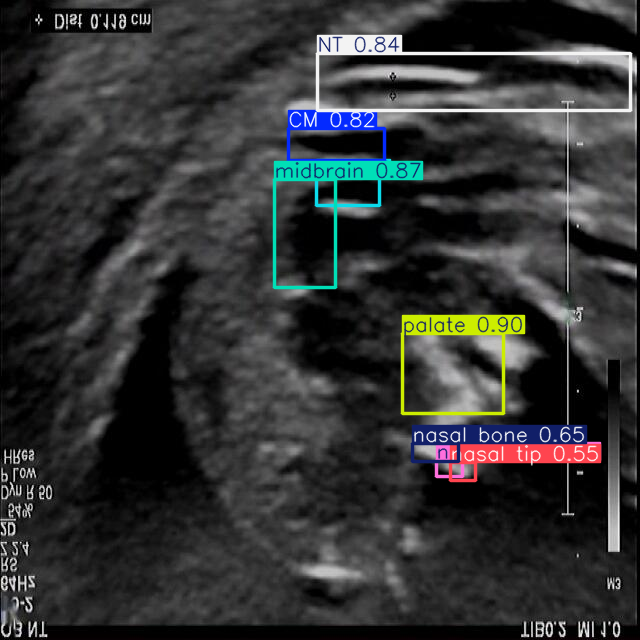

In [7]:
from ultralytics import YOLO

# Load the trained model from the best.pt file
model = YOLO('/content/best.pt')
results = model.predict(source="/content/fetus-object-detection-2/train/images/1001_png.rf.7f63e39c150e1344e242f0416c8e9a9b.jpg", save=True)
for r in results:
  r.show()

# EDA

---



In [9]:
import os

# Path to the dataset
dataset_path = "/content/fetus-object-detection-2"

# List files and directories in the dataset
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 50)
# Count images in the training set
train_images = len(os.listdir(os.path.join(dataset_path, "train", "images")))
train_labels = len(os.listdir(os.path.join(dataset_path, "train", "labels")))

# Count images in the validation set
val_images = len(os.listdir(os.path.join(dataset_path, "valid", "images")))
val_labels = len(os.listdir(os.path.join(dataset_path, "valid", "labels")))

print(f"Training Set: {train_images} images, {train_labels} labels")
print(f"Validation Set: {val_images} images, {val_labels} labels")

Directory: /content/fetus-object-detection-2
Subdirectories: ['test', 'valid', 'train']
Files: ['README.dataset.txt', 'README.roboflow.txt', 'data.yaml']
--------------------------------------------------
Directory: /content/fetus-object-detection-2/test
Subdirectories: ['labels', 'images']
Files: []
--------------------------------------------------
Directory: /content/fetus-object-detection-2/test/labels
Subdirectories: []
Files: ['767_png.rf.447267237f71e7d1cced7008ce5b5a39.txt', '77_png.rf.ee93222edfe8cba79f3d0e793a639b13.txt', '789_png.rf.31ad1c4aa400b68e92033df0d6f5e6b6.txt', '75_png.rf.059abdba6f1297e22704d5faeabf42ed.txt', '765_png.rf.2652bbf03fa1ceca1625e014fe717615.txt', '756_png.rf.e3793c6962309539eec2e518dfb8158d.txt', '718_png.rf.ff58ec0771564b6b8513eaae48e6c453.txt', '810_png.rf.3d80fe0208dc6b9bb6a375ff92a1a934.txt', '723_png.rf.f7b76373ebd9390353ff6f78efc9a187.txt', '776_png.rf.6a46826d70cfbf3e05daeb72667d34ce.txt', '686_png.rf.91cd2e3a09310c5bfa7c5082e2089739.txt', '708

Class Distribution in Training Set:
Class 0: 2257 instances
Class 3: 2314 instances
Class 2: 2287 instances
Class 1: 2296 instances
Class 4: 2094 instances
Class 7: 2122 instances
Class 6: 2042 instances
Class 5: 1753 instances


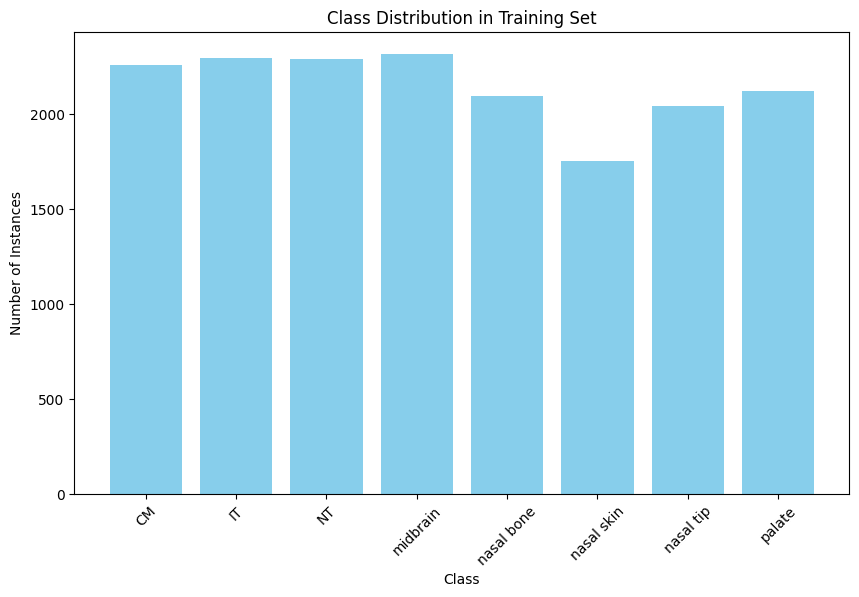

In [10]:
from collections import defaultdict

# Initialize a dictionary to count class occurrences
class_counts = defaultdict(int)

# Path to the training labels
train_labels_path = os.path.join(dataset_path, "train", "labels")

# Iterate through all label files
for label_file in os.listdir(train_labels_path):
    with open(os.path.join(train_labels_path, label_file), "r") as f:
        for line in f:
            class_id = int(line.split()[0])  # First value in the line is the class ID
            class_counts[class_id] += 1

# Print class distribution
print("Class Distribution in Training Set:")
for class_id, count in class_counts.items():
    print(f"Class {class_id}: {count} instances")
import matplotlib.pyplot as plt

# Class names from the data.yaml file
class_names = ['CM', 'IT', 'NT', 'midbrain', 'nasal bone', 'nasal skin', 'nasal tip', 'palate']

# Get counts for each class
counts = [class_counts[i] for i in range(len(class_names))]

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts, color='skyblue')
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(rotation=45)
plt.show()

Empty Label Files in Training Set: 0
Empty Label Files in Validation Set: 0


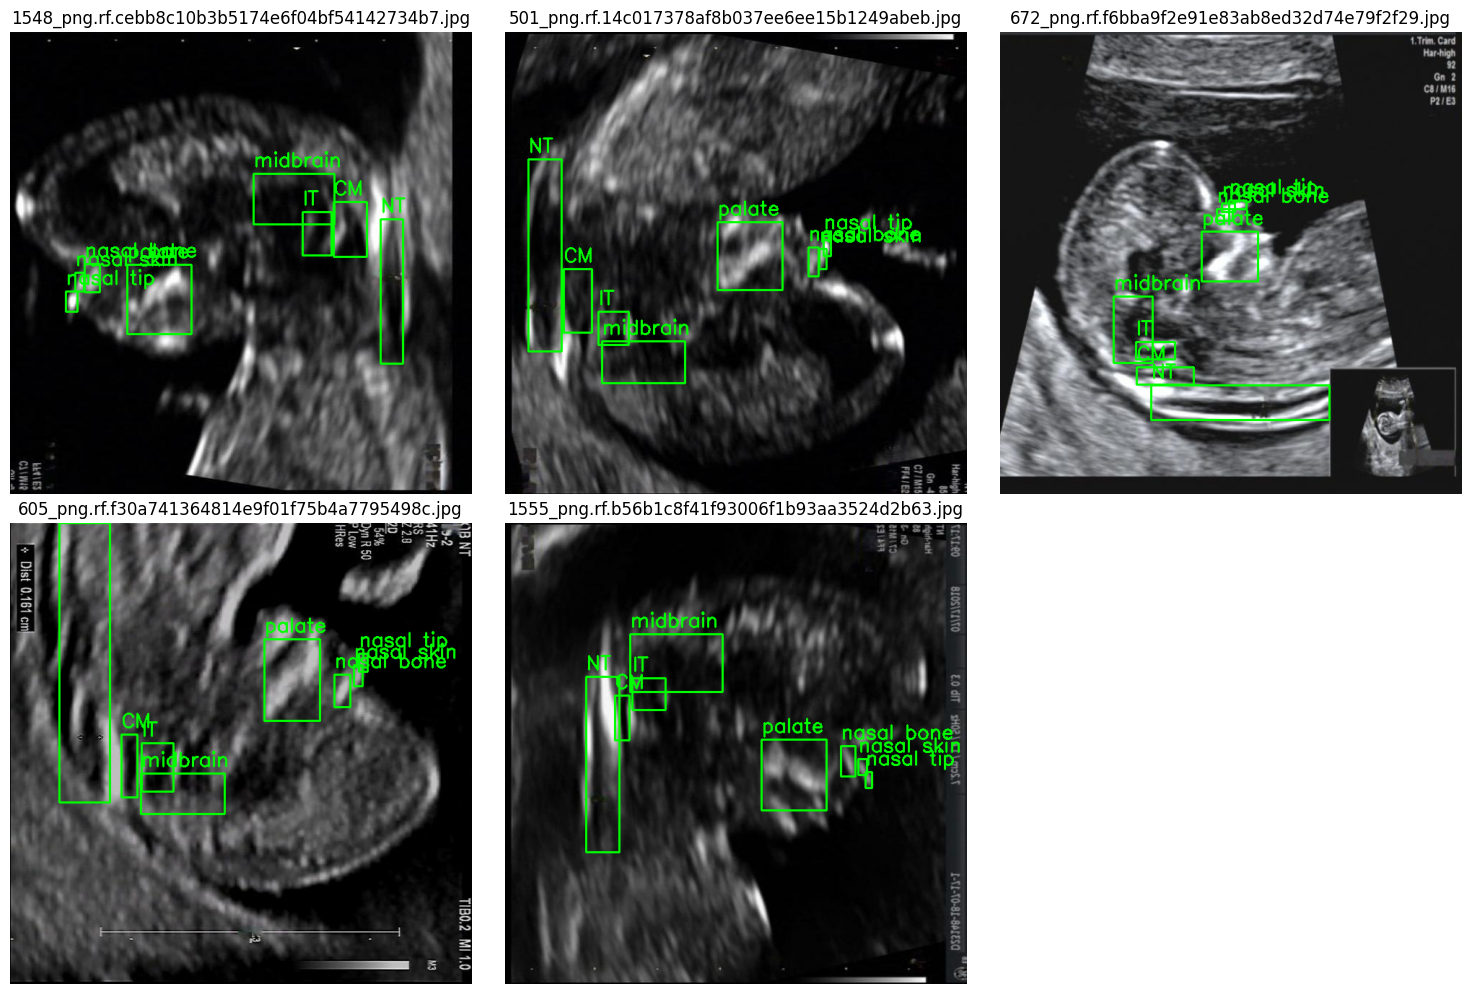

In [11]:
# Function to count empty label files
def count_empty_labels(labels_path):
    empty_count = 0
    for label_file in os.listdir(labels_path):
        file_path = os.path.join(labels_path, label_file)
        if os.stat(file_path).st_size == 0:
            empty_count += 1
    return empty_count

# Count empty label files in training and validation sets
train_empty = count_empty_labels(os.path.join(dataset_path, "train", "labels"))
val_empty = count_empty_labels(os.path.join(dataset_path, "valid", "labels"))

print(f"Empty Label Files in Training Set: {train_empty}")
print(f"Empty Label Files in Validation Set: {val_empty}")
import cv2
import random

# Function to draw bounding boxes on an image
def draw_boxes(image_path, label_path, class_names):
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    with open(label_path, "r") as f:
        for line in f:
            class_id, x_center, y_center, w, h = map(float, line.split())
            x_center, y_center, w, h = x_center * width, y_center * height, w * width, h * height
            x1, y1 = int(x_center - w / 2), int(y_center - h / 2)
            x2, y2 = int(x_center + w / 2), int(y_center + h / 2)

            # Draw the bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, class_names[int(class_id)], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    return image

# Path to the training images and labels
train_images_path = os.path.join(dataset_path, "train", "images")
train_labels_path = os.path.join(dataset_path, "train", "labels")

# Select a random sample of images
sample_images = random.sample(os.listdir(train_images_path), 5)

# Visualize the sample images with bounding boxes
plt.figure(figsize=(15, 10))
for i, image_name in enumerate(sample_images):
    image_path = os.path.join(train_images_path, image_name)
    label_path = os.path.join(train_labels_path, image_name.replace(".jpg", ".txt"))

    image_with_boxes = draw_boxes(image_path, label_path, class_names)
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title(image_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

Training Set Image Sizes:
Min: (640, 640), Max: (640, 640)
Validation Set Image Sizes:
Min: (640, 640), Max: (640, 640)


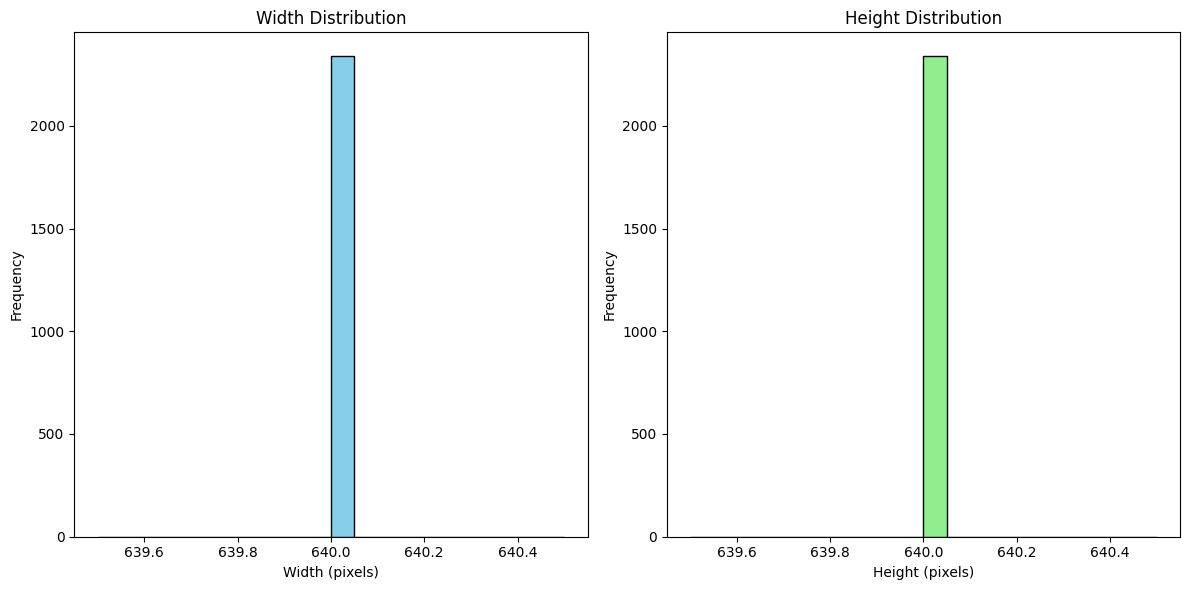

In [13]:
# Function to get image sizes
def get_image_sizes(images_path):
    sizes = []
    for image_name in os.listdir(images_path):
        image_path = os.path.join(images_path, image_name)
        image = cv2.imread(image_path)
        height, width, _ = image.shape
        sizes.append((width, height))
    return sizes

# Get image sizes for training and validation sets
train_sizes = get_image_sizes(os.path.join(dataset_path, "train", "images"))
val_sizes = get_image_sizes(os.path.join(dataset_path, "valid", "images"))

# Print statistics
print("Training Set Image Sizes:")
print(f"Min: {min(train_sizes)}, Max: {max(train_sizes)}")
print("Validation Set Image Sizes:")
print(f"Min: {min(val_sizes)}, Max: {max(val_sizes)}")
import matplotlib.pyplot as plt
import numpy as np

# Function to get image sizes
def get_image_sizes(images_path):
    sizes = []
    for image_name in os.listdir(images_path):
        image_path = os.path.join(images_path, image_name)
        image = cv2.imread(image_path)
        height, width, _ = image.shape
        sizes.append((width, height))
    return sizes

# Get image sizes for training and validation sets
train_sizes = get_image_sizes(os.path.join(dataset_path, "train", "images"))
val_sizes = get_image_sizes(os.path.join(dataset_path, "valid", "images"))

# Extract widths and heights
train_widths = [size[0] for size in train_sizes]
train_heights = [size[1] for size in train_sizes]

# Plot histograms for width and height distribution
plt.figure(figsize=(12, 6))

# Width distribution
plt.subplot(1, 2, 1)
plt.hist(train_widths, bins=20, color='skyblue', edgecolor='black')
plt.title("Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")

# Height distribution
plt.subplot(1, 2, 2)
plt.hist(train_heights, bins=20, color='lightgreen', edgecolor='black')
plt.title("Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

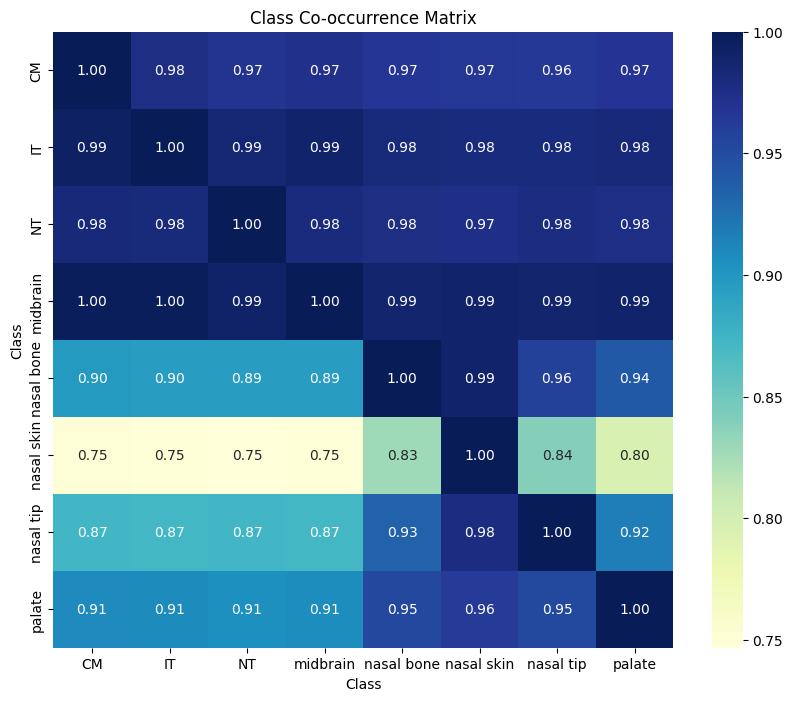

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Initialize a co-occurrence matrix
num_classes = len(class_names)
co_occurrence_matrix = np.zeros((num_classes, num_classes), dtype=int)

# Path to the training labels
train_labels_path = os.path.join(dataset_path, "train", "labels")

# Iterate through all label files
for label_file in os.listdir(train_labels_path):
    with open(os.path.join(train_labels_path, label_file), "r") as f:
        classes_in_image = []
        for line in f:
            class_id = int(line.split()[0])  # First value in the line is the class ID
            classes_in_image.append(class_id)

        # Update the co-occurrence matrix
        for i in range(len(classes_in_image)):
            for j in range(len(classes_in_image)):
                co_occurrence_matrix[classes_in_image[i], classes_in_image[j]] += 1

# Normalize the co-occurrence matrix (optional)
co_occurrence_matrix_normalized = co_occurrence_matrix / np.diag(co_occurrence_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    co_occurrence_matrix_normalized,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.title("Class Co-occurrence Matrix")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

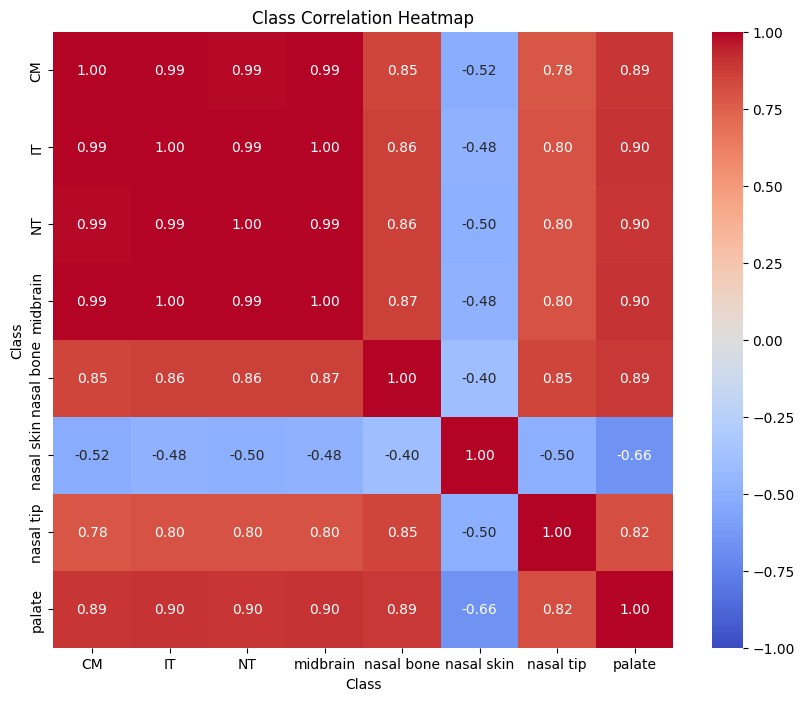

In [15]:
import pandas as pd

# Convert the co-occurrence matrix to a DataFrame for better visualization
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=class_names, columns=class_names)

# Compute the correlation matrix
correlation_matrix = co_occurrence_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.title("Class Correlation Heatmap")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

## **FOR TESTING AND PDF GENERATION**

---



In [ ]:
# prompt: /content/Testing images for Model 2.zip
# unzip this folder

!unzip /content/Testing\ images\ for\ Model\ 2.zip

Archive:  /content/Testing images for Model 2.zip
   creating: Testing images for Model 2/
  inflating: Testing images for Model 2/100_png.rf.1fa067591338e932ba8693820b313db6.jpg  
  inflating: Testing images for Model 2/100_png.rf.35b742e0d2c5fd01d646e8445807ffd1.jpg  
  inflating: Testing images for Model 2/100_png.rf.6bc52d98b94ee5b57a377b4c1046995a.jpg  
  inflating: Testing images for Model 2/101_png.rf.18545b22f763029645d6ae9b0efd9478.jpg  
  inflating: Testing images for Model 2/101_png.rf.6b41b862b694abd5457bd429863463ab.jpg  
  inflating: Testing images for Model 2/101_png.rf.ff7d58b33e2aa0b07f66d68acefad079.jpg  
  inflating: Testing images for Model 2/102_png.rf.08dda7a517201dd39a8c97b8000abad9.jpg  
  inflating: Testing images for Model 2/102_png.rf.3a1e4af1b32670d235618129e66b7da3.jpg  
  inflating: Testing images for Model 2/102_png.rf.5816e2560104256fee304e77f1dade0d.jpg  
  inflating: Testing images for Model 2/103_png.rf.4a06675147707a4df3c9b302be4675a2.jpg  
  inflati

In [ ]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=2f1e899a08d0ccb1f1366836fe80efeb3dbf4875d420c73a59c7b3692a51d700
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


FOR IMPORTING MODEL AND WEIGHTS


In [ ]:
# prompt: /content/model weights and plots.zip
# UNZIP THIS FOLDER

!unzip /content/model\ weights\ and\ plots.zip

Archive:  /content/model weights and plots.zip
   creating: model weights and plots/
   creating: model weights and plots/detect/
   creating: model weights and plots/detect/train/
  inflating: model weights and plots/detect/train/args.yaml  
  inflating: model weights and plots/detect/train/confusion_matrix.png  
  inflating: model weights and plots/detect/train/confusion_matrix_normalized.png  
  inflating: model weights and plots/detect/train/events.out.tfevents.1737126205.fe3b49e322f7.620.0  
  inflating: model weights and plots/detect/train/F1_curve.png  
  inflating: model weights and plots/detect/train/labels.jpg  
  inflating: model weights and plots/detect/train/labels_correlogram.jpg  
  inflating: model weights and plots/detect/train/PR_curve.png  
  inflating: model weights and plots/detect/train/P_curve.png  
  inflating: model weights and plots/detect/train/results.csv  
  inflating: model weights and plots/detect/train/results.png  
  inflating: model weights and plots/d

### FOR GENERATING REPORT PDFS WITH IMAGES

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
from PIL import Image
from fpdf import FPDF

# Path to the trained YOLO model
model_path = '/content/model weights and plots/detect/train/weights/best.pt'

# Load the trained YOLO model
model = YOLO(model_path)

# Define colors for different classes
class_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple',
    5: 'brown',
    6: 'pink',
    7: 'cyan'
}

# Path to the test images directory
test_images_dir = "/content/fetus-object-detection-2/test/images"
output_dir = "/content/fetus-object-detection-2/output"
os.makedirs(output_dir, exist_ok=True)

# Initialize PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Process each image in the test directory
if os.path.exists(test_images_dir):
    image_files = [f for f in os.listdir(test_images_dir) if os.path.isfile(os.path.join(test_images_dir, f))]

    for image_file in image_files:
        image_path = os.path.join(test_images_dir, image_file)

        # Perform prediction using the YOLO model
        results = model.predict(source=image_path, save=False, save_txt=False)

        # Load the image
        img = Image.open(image_path)
        fig, ax = plt.subplots()
        ax.imshow(img)

        # Draw bounding boxes
        for result in results:
            for box in result.boxes.data:
                # Extract bounding box coordinates, confidence, and class
                x1, y1, x2, y2, conf, cls = box.tolist()
                width, height = x2 - x1, y2 - y1
                color = class_colors.get(int(cls), 'black')  # Default to black if class not found

                # Draw the bounding box
                rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor=color, facecolor='none')
                ax.add_patch(rect)

                # Add text label above the bounding box
                class_name = result.names[int(cls)]
                ax.text(x1, y1 - 10, f"{class_name} {conf:.2f}", color=color, fontsize=8, weight='bold')

        plt.axis('off')  # Hide axes

        # Save the result image
        output_image_path = os.path.join(output_dir, image_file)
        plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
        plt.close(fig)

        # Add image to PDF
        pdf.add_page()
        pdf.image(output_image_path, x=10, y=10, w=180)

    # Save the PDF
    pdf_output_path = os.path.join(output_dir, "results.pdf")
    pdf.output(pdf_output_path)

    print(f"Results saved in {output_dir} and PDF created at {pdf_output_path}")

    # Automatically download the PDF
    from google.colab import files
    files.download(pdf_output_path)
else:
    print(f"Test images directory '{test_images_dir}' not found.")



image 1/1 /content/fetus-object-detection-2/test/images/804_png.rf.b7cdd4a8b5e4b3fe19921481ac9bb971.jpg: 640x640 1 CM, 1 IT, 1 NT, 1 midbrain, 1 nasal bone, 1 nasal skin, 1 nasal tip, 1 palate, 382.2ms
Speed: 11.1ms preprocess, 382.2ms inference, 32.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/fetus-object-detection-2/test/images/728_png.rf.788cdfc3bafcc18839cd8335da371e05.jpg: 640x640 2 CMs, 2 ITs, 1 NT, 1 midbrain, 1 nasal bone, 1 nasal tip, 1 palate, 219.1ms
Speed: 3.8ms preprocess, 219.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/fetus-object-detection-2/test/images/772_png.rf.32edd5185e542a1a1533dfde374fa716.jpg: 640x640 1 CM, 1 IT, 1 NT, 1 midbrain, 2 nasal bones, 1 nasal skin, 1 nasal tip, 1 palate, 219.3ms
Speed: 6.1ms preprocess, 219.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/fetus-object-detection-2/test/images/776_png.rf.6a46826d70cfbf3e05daeb72667d34ce.jpg: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### FOR DOWNLOADING THE DIRECTORY

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
from PIL import Image
from fpdf import FPDF

# Path to the trained YOLO model
model_path = '/content/model weights and plots/detect/train/weights/best.pt'

# Load the trained YOLO model
model = YOLO(model_path)

# Define colors for different classes
class_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple',
    5: 'brown',
    6: 'pink',
    7: 'cyan'
}

# Path to the test images directory
test_images_dir = "/content/fetus-object-detection-2/test/images"
output_dir = "/content/predicted_images"
os.makedirs(output_dir, exist_ok=True)

output_images_dir = os.path.join(output_dir, "images")
os.makedirs(output_images_dir, exist_ok=True)

# Initialize PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Process each image in the test directory
if os.path.exists(test_images_dir):
    image_files = [f for f in os.listdir(test_images_dir) if os.path.isfile(os.path.join(test_images_dir, f))]

    for image_file in image_files:
        image_path = os.path.join(test_images_dir, image_file)

        # Perform prediction using the YOLO model
        results = model.predict(source=image_path, save=False, save_txt=False)

        # Load the image
        img = Image.open(image_path)
        fig, ax = plt.subplots()
        ax.imshow(img)

        # Draw bounding boxes
        for result in results:
            for box in result.boxes.data:
                # Extract bounding box coordinates, confidence, and class
                x1, y1, x2, y2, conf, cls = box.tolist()
                width, height = x2 - x1, y2 - y1
                color = class_colors.get(int(cls), 'black')  # Default to black if class not found

                # Draw the bounding box
                rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor=color, facecolor='none')
                ax.add_patch(rect)

                # Add text label above the bounding box
                class_name = result.names[int(cls)]
                ax.text(x1, y1 - 10, f"{class_name} {conf:.2f}", color=color, fontsize=8, weight='bold')

        plt.axis('off')  # Hide axes

        # Save the result image
        output_image_path = os.path.join(output_images_dir, image_file)
        plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
        plt.close(fig)

        # Add image to PDF
        pdf.add_page()
        pdf.image(output_image_path, x=10, y=10, w=180)

    # Save the PDF
    pdf_output_path = os.path.join(output_dir, "results.pdf")
    pdf.output(pdf_output_path)

    print(f"Results saved in {output_dir}, images saved in {output_images_dir}, and PDF created at {pdf_output_path}")

    # Create a zip file of the output images directory
    zip_output_path = os.path.join(output_dir, "predicted_images.zip")
    with zipfile.ZipFile(zip_output_path, 'w') as zipf:
        for root, dirs, files in os.walk(output_images_dir):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), output_images_dir))

    print(f"Output images zipped at {zip_output_path}")

    # Automatically download the zip file
    from google.colab import files
    files.download(zip_output_path)
else:
    print(f"Test images directory '{test_images_dir}' not found.")



image 1/1 /content/fetus-object-detection-2/test/images/804_png.rf.b7cdd4a8b5e4b3fe19921481ac9bb971.jpg: 640x640 1 CM, 1 IT, 1 NT, 1 midbrain, 1 nasal bone, 1 nasal skin, 1 nasal tip, 1 palate, 211.4ms
Speed: 3.5ms preprocess, 211.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/fetus-object-detection-2/test/images/728_png.rf.788cdfc3bafcc18839cd8335da371e05.jpg: 640x640 2 CMs, 2 ITs, 1 NT, 1 midbrain, 1 nasal bone, 1 nasal tip, 1 palate, 215.1ms
Speed: 3.7ms preprocess, 215.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/fetus-object-detection-2/test/images/772_png.rf.32edd5185e542a1a1533dfde374fa716.jpg: 640x640 1 CM, 1 IT, 1 NT, 1 midbrain, 2 nasal bones, 1 nasal skin, 1 nasal tip, 1 palate, 201.4ms
Speed: 3.8ms preprocess, 201.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/fetus-object-detection-2/test/images/776_png.rf.6a46826d70cfbf3e05daeb72667d34ce.jpg: 64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **FOR VALIDATION**

---



In [ ]:
# prompt: /content/fetus-object-detection-2/output  and /content/labelled_test_dataset
# I want the images of these two folders to be opened side by side since both have same names, do that for every file
#                     FOR VALIDATION PURPOSES
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the paths to the two directories
dir1 = "/content/fetus-object-detection-2/output"
dir2 = "/content/labelled_test_dataset"

# Get a list of common filenames (excluding file extensions)
common_filenames = set(os.listdir(dir1)) & set(os.listdir(dir2))
common_filenames = {os.path.splitext(filename)[0] for filename in common_filenames}

# Iterate through the common filenames
for filename in common_filenames:
    # Construct the full paths to the images in both directories
    image1_path = os.path.join(dir1, f"{filename}.jpg") # Assuming .jpg extension, adjust as needed
    image2_path = os.path.join(dir2, f"{filename}.jpg") # Assuming .jpg extension, adjust as needed

    # Check if both image files exist
    if os.path.exists(image1_path) and os.path.exists(image2_path):
        try:
            # Read images
            img1 = mpimg.imread(image1_path)
            img2 = mpimg.imread(image2_path)

            # Create a figure and subplots
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

            # Display images in the subplots
            axes[0].imshow(img1)
            axes[0].set_title(f"Image 1: {filename}")
            axes[0].axis('off')

            axes[1].imshow(img2)
            axes[1].set_title(f"Image 2: {filename}")
            axes[1].axis('off')

            # Adjust layout and display the plot
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error displaying images for {filename}: {e}")
    else:
        print(f"One or both images not found for {filename}")

In [ ]:
# prompt: /content/fetus-object-detection-2/test/images
# download this folder

from google.colab import files
import shutil

# Define the source directory
source_dir = "/content/fetus-object-detection-2/test/images"

# Create a zip archive of the directory
shutil.make_archive("test_images", 'zip', source_dir)

# Download the zip file
files.download("test_images.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import cv2
import numpy as np

# Define directories
input_dir = '/content/fetus-object-detection-2/test/images'
labels_dir = '/content/fetus-object-detection-2/test/labels'
output_dir = 'labelled_test_dataset'

# Class names and corresponding colors (BGR format)
names = ['CM', 'IT', 'NT', 'midbrain', 'nasal bone', 'nasal skin', 'nasal tip', 'palate']
colors = [
    (255, 0, 0),       # Red
    (0, 0, 255),       # Blue
    (0, 255, 0),       # Green
    (255, 165, 0),     # Orange
    (128, 0, 128),     # Purple
    (165, 42, 42),     # Brown
    (255, 192, 203),   # Pink
    (0, 255, 255)      # Cyan
]

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Loop through each image in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load image
        img_path = os.path.join(input_dir, filename)  # Corrected variable name
        image = cv2.imread(img_path)
        height, width, _ = image.shape

        # Load corresponding label file
        label_path = os.path.join(labels_dir, filename.replace('.jpg', '.txt').replace('.png', '.txt'))

        if os.path.exists(label_path):  # Check if the label file exists
            with open(label_path, 'r') as file:
                lines = file.readlines()

            # Annotate each label
            for line in lines:
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center = float(parts[1]) * width
                y_center = float(parts[2]) * height
                box_width = float(parts[3]) * width
                box_height = float(parts[4]) * height

                # Calculate bounding box coordinates
                x1 = int(x_center - box_width / 2)
                y1 = int(y_center - box_height / 2)
                x2 = int(x_center + box_width / 2)
                y2 = int(y_center + box_height / 2)

                # Draw bounding box and label on the image using class-specific colors
                cv2.rectangle(image, (x1, y1), (x2, y2), colors[class_id], 2)  # Draw rectangle in class color
                cv2.putText(image, names[class_id], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[class_id], 2)

            # Save the annotated image to the output directory
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, image)

print("Annotated images saved to:", output_dir)


Annotated images saved to: labelled_test_dataset
